In [33]:
%load_ext autoreload
%autoreload 2

import cv2
import keras
import numpy as np
import pandas as pd
import pandas as pd

from matplotlib.pyplot import *
from utility import *

from scipy import optimize, sqrt
from matplotlib.patches import Ellipse


Using TensorFlow backend.


ImportError: cannot import name 'abs'

In [2]:
info = """v05_T2_R_3d,7302.47,228.58,7500
v06_T1_L_3d,7500,274.21,7500
v04_T1_L_3d,7420.48,308.71,7500
v02_T2_L_3d,7311.48,306.65,7500
v04_T1_R_3d,7326.07,319.37,7500
v01_T2_L_3d,7500,253.19,7500
v02_T1_R_3d,7411.04,281.72,7500
v03_T1_L_3d,7201.62,306.67,7500
v04_T2_R_3d,7424.77,214.81,7500
v05_T1_L_3d,7500,324.97,7500
v06_T1_R_3d,7476.69,397.99,7500
v03_T1_R_3d,7199.05,267.50,7500
v05_T2_L_3d,7403.31,405.86,7500
v02_T2_R_3d,7408.89,287.19,7500
v01_T2_R_3d,7500,340.53,7500
v04_T2_L_3d,7425.20,274.28,7500
v02_T1_L_3d,7212.35,253.20,7500
v01_T1_L_3d,7408.89,359.44,7500
v05_T1_R_3d,7500,317.93,7500
v06_T2_L_3d,7376.71,269.32,7500
v03_T2_L_3d,7257.84,243.52,7500
v03_T2_R_3d,7312.77,268.11,7500
v01_T1_R_3d,7206.34,305.86,7500"""
ImageInfo = collections.namedtuple('ImageInfo', 'y, z, x')
df = {name: ImageInfo(*(float(x) for x in rest)) 
      for name, *rest in [x.split(',') for x in info.split('\n')]}

In [3]:
df

{'v05_T2_R_3d': ImageInfo(y=7302.47, z=228.58, x=7500.0),
 'v06_T1_L_3d': ImageInfo(y=7500.0, z=274.21, x=7500.0),
 'v04_T1_L_3d': ImageInfo(y=7420.48, z=308.71, x=7500.0),
 'v02_T2_L_3d': ImageInfo(y=7311.48, z=306.65, x=7500.0),
 'v04_T1_R_3d': ImageInfo(y=7326.07, z=319.37, x=7500.0),
 'v01_T2_L_3d': ImageInfo(y=7500.0, z=253.19, x=7500.0),
 'v02_T1_R_3d': ImageInfo(y=7411.04, z=281.72, x=7500.0),
 'v03_T1_L_3d': ImageInfo(y=7201.62, z=306.67, x=7500.0),
 'v04_T2_R_3d': ImageInfo(y=7424.77, z=214.81, x=7500.0),
 'v05_T1_L_3d': ImageInfo(y=7500.0, z=324.97, x=7500.0),
 'v06_T1_R_3d': ImageInfo(y=7476.69, z=397.99, x=7500.0),
 'v03_T1_R_3d': ImageInfo(y=7199.05, z=267.5, x=7500.0),
 'v05_T2_L_3d': ImageInfo(y=7403.31, z=405.86, x=7500.0),
 'v02_T2_R_3d': ImageInfo(y=7408.89, z=287.19, x=7500.0),
 'v01_T2_R_3d': ImageInfo(y=7500.0, z=340.53, x=7500.0),
 'v04_T2_L_3d': ImageInfo(y=7425.2, z=274.28, x=7500.0),
 'v02_T1_L_3d': ImageInfo(y=7212.35, z=253.2, x=7500.0),
 'v01_T1_L_3d': Image

In [4]:
from sklearn.linear_model import LinearRegression
def adjust_tilt(img):
    median = np.median(img)
    q1 = np.percentile(img, 25)
    q3 = np.percentile(img, 75)
    iqr = q3 - q1
    poinst = np.where((img > median - 2 * iqr) & (img < median + 2 * iqr))
    y = img[poinst]
    X = np.array(poinst).T
    model = LinearRegression(n_jobs=8, normalize=True)
    model.fit(X, y)
    poinst = np.where(img > -10)
    y = img[poinst]
    X = np.array(poinst).T   
    y_pred = model.predict(X)
    print(model.coef_)
    adjusted = (y + y.mean() - y_pred).reshape(img.shape)
    negative_indices = np.where(img < 0)
    adjusted[negative_indices] = img[negative_indices]
    return adjusted

In [5]:
import os
import glob
import re
import pickle
c = re.compile('.np')
for file in glob.glob('dataset/*3d.csv'):
    print(file)
    np_file_name = file.split('.')[0]+".np"
    if not os.path.exists(np_file_name):
        df = pd.read_csv(file)
        with open(np_file_name, 'wb') as f:
            pickle.dump(np.array(df, dtype='float32'), f) 
        del df
    else:
        print("file " + np_file_name + " already exists")

dataset/v05_T1_R_3d.csv
file dataset/v05_T1_R_3d.np already exists
dataset/v04_T1_L_3d.csv
file dataset/v04_T1_L_3d.np already exists
dataset/v03_T1_R_3d.csv
file dataset/v03_T1_R_3d.np already exists
dataset/v03_T1_L_3d.csv
file dataset/v03_T1_L_3d.np already exists
dataset/v04_T2_L_3d.csv
file dataset/v04_T2_L_3d.np already exists
dataset/v01_T2_L_3d.csv
file dataset/v01_T2_L_3d.np already exists
dataset/v01_T2_R_3d.csv
file dataset/v01_T2_R_3d.np already exists
dataset/v01_T1_L_3d.csv
file dataset/v01_T1_L_3d.np already exists
dataset/v04_T2_R_3d.csv
file dataset/v04_T2_R_3d.np already exists
dataset/v02_T1_L_3d.csv
file dataset/v02_T1_L_3d.np already exists
dataset/v05_T1_L_3d.csv
file dataset/v05_T1_L_3d.np already exists
dataset/v02_T1_R_3d.csv
file dataset/v02_T1_R_3d.np already exists
dataset/v01_T1_R_3d.csv
file dataset/v01_T1_R_3d.np already exists
dataset/v03_T2_L_3d.csv
file dataset/v03_T2_L_3d.np already exists
dataset/v03_T2_R_3d.csv
file dataset/v03_T2_R_3d.np already ex

In [6]:
base_name = 'v04_T1_R_3d'
with open('dataset/%s.np'%base_name, 'rb') as f:
    img = pickle.load(f)
img_info = df[base_name]

In [7]:
w, h = img.shape
resize_factor = 1
resized_img = cv2.resize(img, (h//resize_factor, w//resize_factor))

In [8]:
scale = img_info.x / resized_img.shape[1]
scale

0.41372462488967343

[*] Starting to align ...
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
len(X) is 0
[*] a = 0.012056204306972539


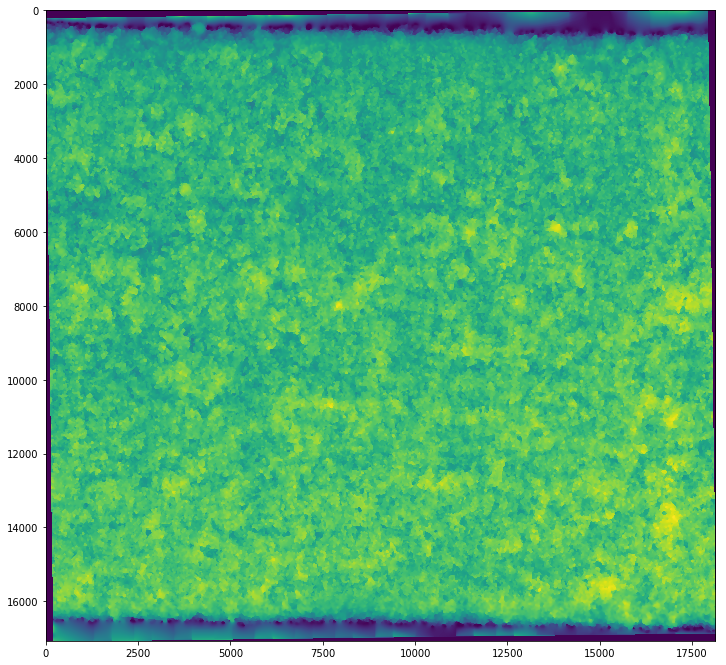

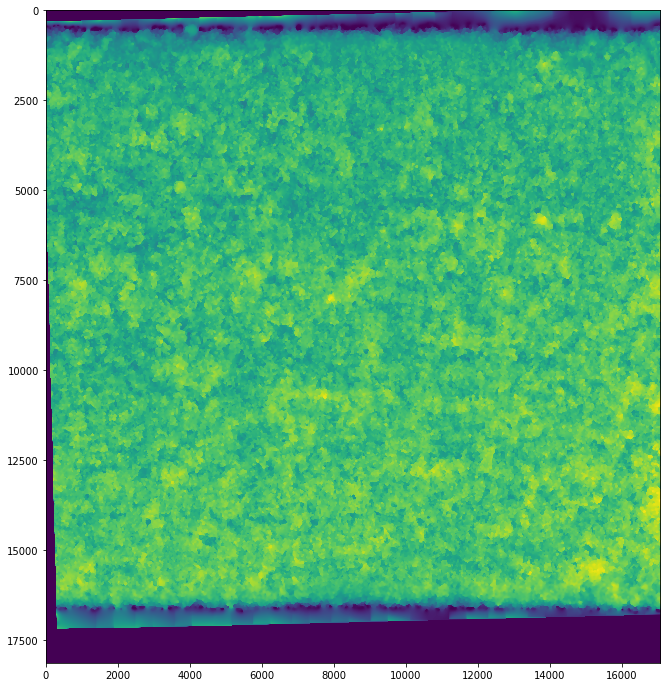

In [9]:
rcParams['figure.figsize'] = 12, 12
#file_name = 'dataset/v04_T1_R_3d_factor%3d_rotated.np'%resize_factor
#if os.path.exists(file_name):
#    print('rotated_file already_exists')
#    with open(file_name, 'rb') as f:
#        rotated = pickle.load(f)
#else:
#    rotated, *_ = align_image(resized_img)
#    with open(file_name, 'wb') as f:
#        pickle.dump(rotated, f)
rotated, *_ = align_image(resized_img)
imshow(resized_img)
#savefig('/home/bzr0014/Documents/original.svg')       
show()
imshow(rotated)
#savefig('/home/bzr0014/Documents/rotated.svg')


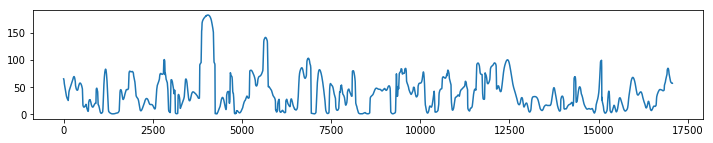

In [11]:
rcParams['figure.figsize'] = 12, 2
plot(rotated[520,:])

In [15]:
#adjusted_rotated = adjust_tilt(rotated)
adjusted_rotated = rotated

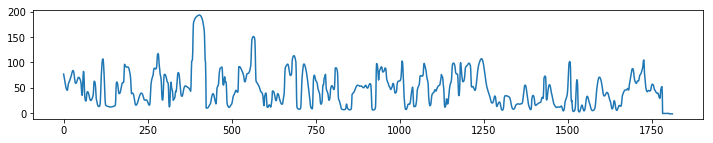

In [9]:
plot(adjusted_rotated[52,:])

In [379]:
from keras.layers import Input, Dense, Conv1D, MaxPool1D, Flatten, UpSampling1D
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, UpSampling2D
from keras.models import Sequential, Model
from keras.callbacks import TensorBoard

In [8]:
resized_img.shape

(1677, 1783)

In [32]:
input_shape = np.array(output_shape)//8 * 8
output_shape = input_shape
#output_shape = rotated.shape
def train_model():
    input_img = Input(shape=(*input_shape, 1))  # adapt this if using `channels_first` image data format
    x = Conv2D(5, (8,8), activation='relu', padding='same')(input_img)
    x = MaxPool2D((2, 2), padding='same')(x)
    x = Conv2D(5, (8,8), activation='relu', padding='same')(x)
    x = MaxPool2D((2, 2), padding='same')(x)
    x = Conv2D(5, (8,8), activation='relu', padding='same')(x)
    encoded = MaxPool2D((2, 2), padding='same', name='encoder')(x)

    # at this point the representation is (4, 4, 8) i.e. 128-dimensional

    x = Conv2D(5, (8,8), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(5, (8,8), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(5, (3,3), padding='same', activation='relu')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (8,8), activation='relu', padding='same')(x)
    print(input_img, decoded)
    print((output_shape[0]//2//2//2)*2*2*2)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')
    return autoencoder

autoencoder = train_model()

Tensor("input_6:0", shape=(?, 1672, 1776, 1), dtype=float32) Tensor("conv2d_42/Relu:0", shape=(?, 1672, 1776, 1), dtype=float32)
1672


In [33]:
rotated_reshaped = rotated[tuple(slice(x) for x in output_shape)].reshape(1, *output_shape, 1)

In [34]:
rotated_reshaped.shape

(1, 1672, 1776, 1)

In [ ]:
autoencoder.fit(rotated_reshaped, rotated_reshaped,
                epochs=1000,
                #batch_size=128,
                shuffle=True,
                #validation_data=(rotated_reshaped, rotated_reshaped),
                #callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)]
               )

autoencoder.save('autoencoder.h5')

Epoch 1/1000


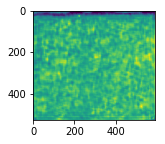

In [17]:
imshow(autoencoder.predict(rotated_reshaped)[0,...,0])

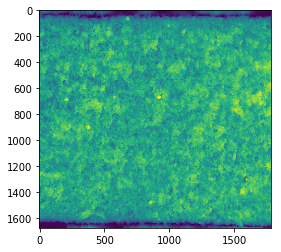

In [5]:
imshow(resized_img)

In [39]:
rcParams['figure.figsize'] = 18, 2

In [38]:
row = np.random.randint(rotated.shape[0])
row = 10080
print("row number %r"%row)
profile = adjusted_rotated[row]
profile = profile[profile > 0]

row number 10080


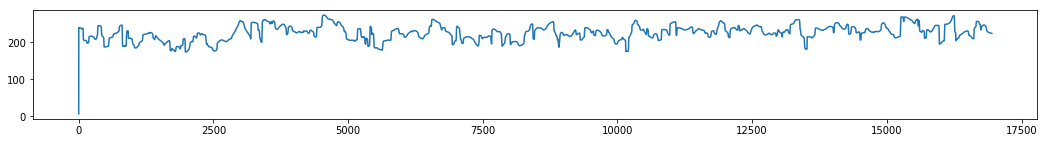

In [39]:
plot(profile)

kernel size param 40
16950 16950 40
16870 16870


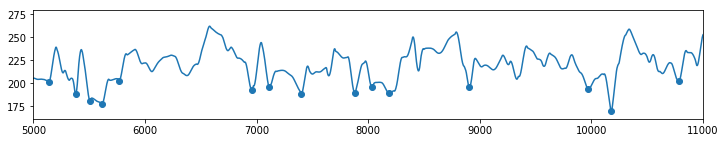

In [59]:
rcParams['figure.figsize'] = 12, 2
_kernel_size = int(np.percentile(get_cut_points(profile, profile.mean()), 25))
print("kernel size param %r"%_kernel_size)
fig, ax = subplots()
x, y, der1, der2, local_minima_2d, circles = extract_circles(np.arange(len(profile)), 
                                                             profile,
                                                             kernel_size_param=_kernel_size,
                                                             same_scale=False, x_scale=scale)
ax.set_xlim(np.array([5000, 11000]))
ax.plot(x, y)
ax.scatter(x[local_minima_2d], y[local_minima_2d])
savefig('/home/bzr0014/Documents/sample.svg')

Skipped drawing circle at 486 due to radius of curvature being too high
Skipped drawing circle at 1020 due to radius of curvature being too high
Skipped drawing circle at 1549 due to radius of curvature being too high
Skipped drawing circle at 1832 due to radius of curvature being too high
Skipped drawing circle at 2691 due to radius of curvature being too high
Skipped drawing circle at 8148 due to radius of curvature being too high


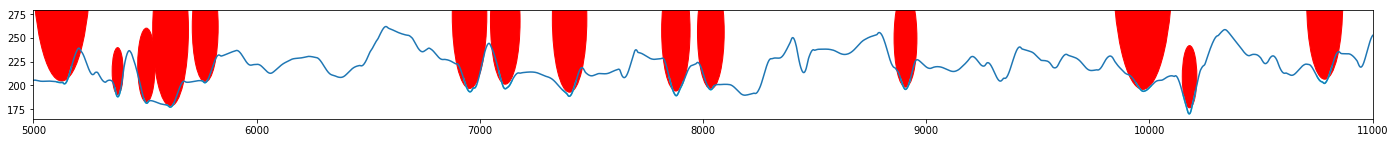

In [56]:
rcParams['figure.figsize'] = 24, 2
fig, ax = subplots()
ax.set_xlim(np.array([5000, 11000]))
draw_circles(x, y, circles, ax=ax, drop_large_radius=True)
#savefig('/home/bzr0014/Documents/circles.svg')

Skipped drawing circle at 486 due to radius of curvature being too high
Skipped drawing circle at 1020 due to radius of curvature being too high
Skipped drawing circle at 1549 due to radius of curvature being too high
Skipped drawing circle at 1832 due to radius of curvature being too high
Skipped drawing circle at 2691 due to radius of curvature being too high
Skipped drawing circle at 8148 due to radius of curvature being too high


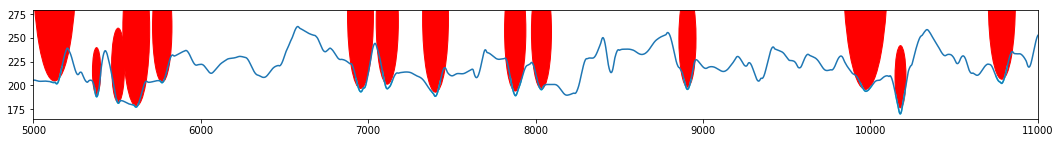

In [55]:
rcParams['figure.figsize'] = 18, 2
fig, ax = subplots()
ax.set_xlim(np.array([5000, 11000]))
draw_circles(x, y, circles, ax=ax, drop_large_radius=True)
savefig('/home/bzr0014/Documents/circles.svg')

In [48]:
circles

[]

In [59]:
def get_all_circles(rotated):
    allCircles = []
    for i, profile in enumerate(rotated):
        _kernel_size = int(np.percentile(get_cut_points(profile, profile.mean()), 25))
        print("kernel size param %r"%_kernel_size)
        x, y, der1, der2, local_minima_2d, circles = extract_circles(profile, kernel_size_param=_kernel_size)
        if i%300==0:
            draw_circles(x, y, circles)
            show()
        allCircles.append(circles)
    return allCircles
#plot(x, y)
#scatter(x[local_minima_2d], y[local_minima_2d])

In [76]:
df

,profile,beg,end,index,h,cx,cy,r,x_mean,x_std,y_mean,y_std
0,18,1779,1792,1785,38.185211,3.615543e-10,-6.013708e-17,0.627782,1794.5,3.452053,0.361229,4.949888
1,19,188,197,192,-1.000000,3.641097e-02,8.174380e-01,1.134239,202.0,2.581989,-0.644859,7.580808
2,19,1779,1792,1785,38.303581,1.470398e-09,4.394633e-17,0.627715,1794.5,3.452053,0.366101,4.965578
3,20,1451,1462,1456,8.946073,1.009294e-16,5.677277e-17,0.728970,1466.0,3.162278,1.179742,0.623788
4,20,1779,1792,1785,38.407120,1.468663e-09,5.088522e-17,0.619909,1794.5,3.452053,0.406403,5.032064
...,...,...,...,...,...,...,...,...,...,...,...,...
28364,1761,0,11,5,0.000000,1.009294e-16,-4.037175e-17,0.685690,15.0,3.162278,-0.303870,3.146749
28365,1761,1159,1166,1162,33.126678,-4.925466e-02,1.268826e-16,0.726124,1172.0,2.000000,-2.415005,1.585573
28366,1762,0,11,5,0.000000,1.009294e-16,7.212512e-01,1.027797,15.0,3.162278,-0.285811,3.221105
28367,1763,0,11,5,0.000000,1.009294e-16,-4.037175e-17,0.686009,15.0,3.162278,-0.267333,3.295701


In [87]:
resize_factor = 10
columns = ['profile'] + list(Circle._fields)
for image_name in glob.glob('dataset/*3d.np'):
    df_file_name =  os.path.splitext(image_name)[0]+'.df'
    if os.path.exists(df_file_name):
        print('dataframe %s already exists'%df_file_name)
        continue
    with open(image_name, 'rb') as f:
        img = pickle.load(f)
    print("image %s loaded"%image_name)
    w, h = img.shape
    resized_img = cv2.resize(img, (h//resize_factor, w//resize_factor))
    rotated = align_image(resized_img)
    print('image rotated')
    allCircles = get_all_circles(rotated)
    df = pd.DataFrame(((i, *circle) for i, circles in enumerate(allCircles) for circle in circles), columns=columns)
    print("Dataframe to be saved as %s"%df_file_name)
    with open(df_file_name, 'wb') as f:
        pickle.dump(df, f)

dataframe dataset/v05_T1_L_3d.df already exists
dataframe dataset/v02_T2_L_3d.df already exists
dataframe dataset/v01_T2_L_3d.df already exists
dataframe dataset/v02_T1_R_3d.df already exists
dataframe dataset/v03_T2_L_3d.df already exists
dataframe dataset/v03_T2_R_3d.df already exists
dataframe dataset/v01_T2_R_3d.df already exists
dataframe dataset/v01_T1_R_3d.df already exists
dataframe dataset/v03_T1_L_3d.df already exists
dataframe dataset/v04_T2_L_3d.df already exists
dataframe dataset/v03_T1_R_3d.df already exists
dataframe dataset/v04_T1_R_3d.df already exists
dataframe dataset/v01_T1_L_3d.df already exists
dataframe dataset/v04_T1_L_3d.df already exists
dataframe dataset/v02_T2_R_3d.df already exists
dataframe dataset/v04_T2_R_3d.df already exists
dataframe dataset/v05_T1_R_3d.df already exists
dataframe dataset/v02_T1_L_3d.df already exists


,profile,beg,end,index,h,cx,cy,r,x_mean,x_std,y_mean,y_std
25549,1520,247,262,254,166.028809,1.721797e-01,1.539509e-15,0.720242,264.0,4.320494,147.954194,6.218578
25550,1520,544,557,550,172.634064,-5.124106e-17,1.947160e-15,0.809133,560.0,3.741657,154.117966,5.804458
25551,1520,575,588,581,173.480042,-5.124106e-17,5.491334e-15,0.833084,591.0,3.741657,156.723863,2.380810
25552,1520,693,704,698,158.025375,1.009294e-16,5.490558e-15,0.784927,708.0,3.162278,149.294773,1.893412
25553,1520,733,752,742,148.748322,-1.168656e-17,1.308895e-15,0.661092,752.0,5.477226,146.644986,8.194815
25554,1520,771,784,777,188.377701,-5.124106e-17,-2.570593e-15,0.784098,787.0,3.741657,159.219954,4.338402
25555,1520,815,824,819,191.914917,-4.016615e-02,1.258253e-15,0.788982,829.0,2.581989,154.207610,5.105366
25556,1520,911,924,917,205.439148,-5.124106e-17,8.540177e-16,0.819587,927.0,3.741657,160.849932,7.726629
25557,1520,966,979,972,174.266312,-5.124106e-17,-6.490535e-16,0.808301,982.0,3.741657,159.593518,3.398057
25558,1520,1041,1052,1046,183.046616,1.009294e-16,-2.281004e-15,0.825245,1056.0,3.162278,153.197904,5.664834


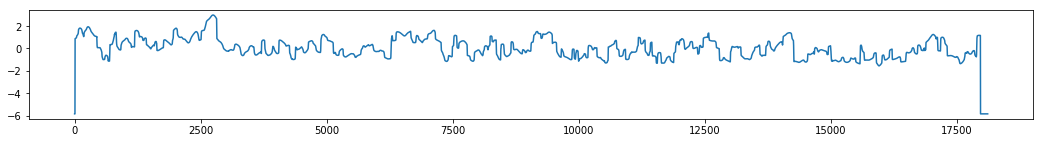

In [86]:
plot(normalize(img[1520])[0])
df[df['profile']==1520]

In [273]:
median = np.median(resized_img)
q1 = np.percentile(resized_img, 25)
q3 = np.percentile(resized_img, 75)
iqr = q3 - q1
poinst = np.where((resized_img > median - 2 * iqr) & (resized_img < median + 2 * iqr))
y = resized_img[poinst]
X = np.array(poinst).T

In [274]:
X.shape

(2853554, 2)

In [275]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=8, normalize=True)

In [276]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=8, normalize=True)

In [283]:
y_pred = model.predict(X)
diff = y_pred-y

In [284]:
np.sqrt(np.mean(diff**2))

23.486677667417332

In [285]:
X_scaled[1000]

array([-1.78522867,  1.31740324])

In [286]:
y - model.predict(X)

array([  0.59093813,   0.71002372,   0.85706341, ..., -92.64387408,
       -93.49221098, -94.3435386 ])

In [305]:
print(model.coef_)
print(np.mean(diff))
print(np.std(diff))
print(np.mean(y))
print(np.std(y))

[0.02326387 0.00795909]
-1.0505126368884455e-15
23.486677667417332
218.09235
26.16847


In [314]:
poinst

(array([   0,    0,    0, ..., 1706, 1706, 1706]),
 array([1632, 1633, 1634, ...,  113,  114,  115]))

In [319]:
a = resized_img.copy()

In [322]:
a[poinst] = diff

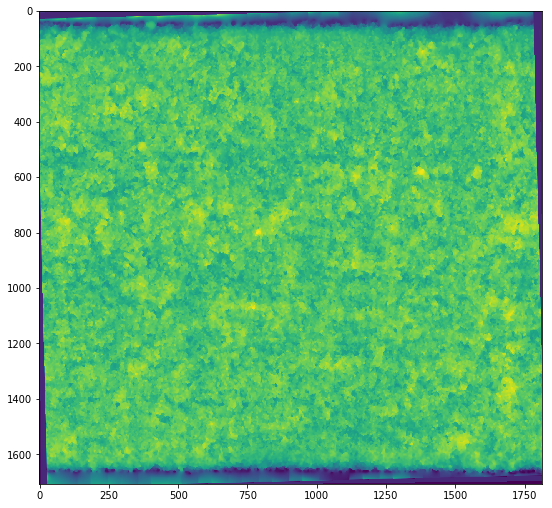

In [27]:
rcParams['figure.figsize'] = 9, 9
imshow(adjusted_rotated)

In [47]:
rotated.max() - rotated[rotated > 0].min()

319.18433

In [48]:
adjusted_rotated.max() - adjusted_rotated[adjusted_rotated>0].min()

300.6300300851785

[array([[   0,    1,    2, ..., 1704, 1705, 1706],
        [   0,    1,    2, ..., 1704, 1705, 1706],
        [   0,    1,    2, ..., 1704, 1705, 1706],
        ...,
        [   0,    1,    2, ..., 1704, 1705, 1706],
        [   0,    1,    2, ..., 1704, 1705, 1706],
        [   0,    1,    2, ..., 1704, 1705, 1706]]),
 array([[   0,    0,    0, ...,    0,    0,    0],
        [   1,    1,    1, ...,    1,    1,    1],
        [   2,    2,    2, ...,    2,    2,    2],
        ...,
        [1809, 1809, 1809, ..., 1809, 1809, 1809],
        [1810, 1810, 1810, ..., 1810, 1810, 1810],
        [1811, 1811, 1811, ..., 1811, 1811, 1811]])]

In [344]:
np.allclose(np.where(resized_img > -5)[0],  np.meshgrid(np.arange(w), np.arange(h))[0].reshape(-1))

False

[0.02331759 0.00810673]


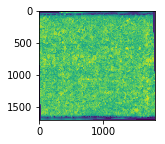

In [51]:
imshow(adjust_tilt(rotated))

1792 1792
i2 <= i1+3
get_neighborhood at index 1791 returned None
Skipped drawing circle at 721 due to radius of curvature being too high


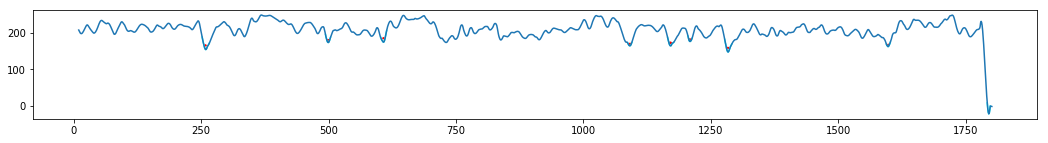

In [16]:
rcParams['figure.figsize'] = 18, 2
x, y, *_, circles = extract_circles(adjusted_rotated[300], _kernel_size)
draw_circles(x, y, circles)

In [37]:
threed = cv2.imread('dataset/v02_T1_L_3d.jpg', 0)

In [121]:
files = list(set(glob.glob('dataset/*3d.jpg')) | set(glob.glob('dataset/*3d.tif')))
i = 0

In [145]:
df

,Image,y,z,x
0,dataset//v05_T2_R_3d.jpg,7302.47,228.58,7500
1,dataset/v06_T1_L_3d.jpg,7500,274.21,7500
2,dataset/v04_T1_L_3d.jpg,7420.48,308.71,7500
3,dataset/v02_T2_L_3d.jpg,7311.48,306.65,7500
4,dataset/v04_T1_R_3d.jpg,7326.07,319.37,7500
5,dataset/v01_T2_L_3d.tif,7500,253.19,7500
6,dataset/v02_T1_R_3d.jpg,7411.04,281.72,7500
7,dataset/v03_T1_L_3d.jpg,7201.62,306.67,7500
8,dataset/v04_T2_R_3d.jpg,7424.77,214.81,7500
9,dataset/v05_T1_L_3d.jpg,7500,324.97,7500


In [150]:
7500/mardas.shape[1]

0.41948654846467925

In [28]:
import numpy as np
N = 100000
X = np.random.rand(N)-.5
y = np.random.randn(N)* 10

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
model = LinearRegression(fit_intercept=True)

In [31]:
model.fit(X.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
print(model.coef_)
print(model.intercept_)

[-0.03225852]
0.04124230763495222
